# 01a - COCO Dataset

## 1. COCO PythonAPI

First we will use the COCO PythonAPI `pycocotools` to load the COCO dataset and learn how to read its annotations. To install `pycocotools`, run:

```bash
!pip install pycocotools>=2.0.1
```

COCO PythonAPI's Tutorial: [pycocoDemo.ipynb](https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb)

First we download COCO's annotation files and then put these `json` files into `COCOdataset2017/annotations/`.

In [1]:
# Download and unzip annotations
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip
!mkdir COCOdataset2017
!mv annotations COCOdataset2017/

--2020-06-22 20:48:31--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.46.92
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.46.92|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  88.4MB/s    in 2.7s    

2020-06-22 20:48:33 (88.4 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [2]:
from pycocotools.coco import COCO
from tqdm import tqdm_notebook
import urllib.request
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

Load annotations:

In [3]:
# Initialize COCO api for instance annotations
# COCO take the .json annotation file as input
coco = COCO('COCOdataset2017/annotations/instances_train2017.json')

loading annotations into memory...
Done (t=18.60s)
creating index...
index created!


COCO dataset has 80 categories:

In [4]:
# Get all categories
cats = coco.loadCats(coco.getCatIds())

# Print categories
nms=[cat['name'] for cat in cats]
print(f"{len(cats)} categories: \n{', '.join(nms)}")

80 categories: 
person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush


For the purpose of understanding COCO annotations, we will only download images of 3 classes: person, car and bicycle.

In [5]:
# Specify classes to download
catIds = coco.getCatIds(catNms=['person', 'car', 'bicycle'])

# Get images ids
imgIds = coco.getImgIds(catIds=catIds)

# Load images
images = coco.loadImgs(imgIds)

print(len(imgIds))
print("imgIds: ", imgIds[0])
print("images: ", images[0])

1101
imgIds:  247808
images:  {'license': 3, 'file_name': '000000247808.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000247808.jpg', 'height': 640, 'width': 378, 'date_captured': '2013-11-23 05:08:51', 'flickr_url': 'http://farm1.staticflickr.com/199/485431395_f55e8bb06d_z.jpg', 'id': 247808}


Let's download 1101 images using urls provided:

In [ ]:
im_folder = 'COCOdataset2017/images/train/'

# Download images
for im in tqdm_notebook(images):
    im_path = im_folder + im['file_name']
    if not os.path.exists(im_path):
        urllib.request.urlretrieve(im['coco_url'], im_path)

Display an example:

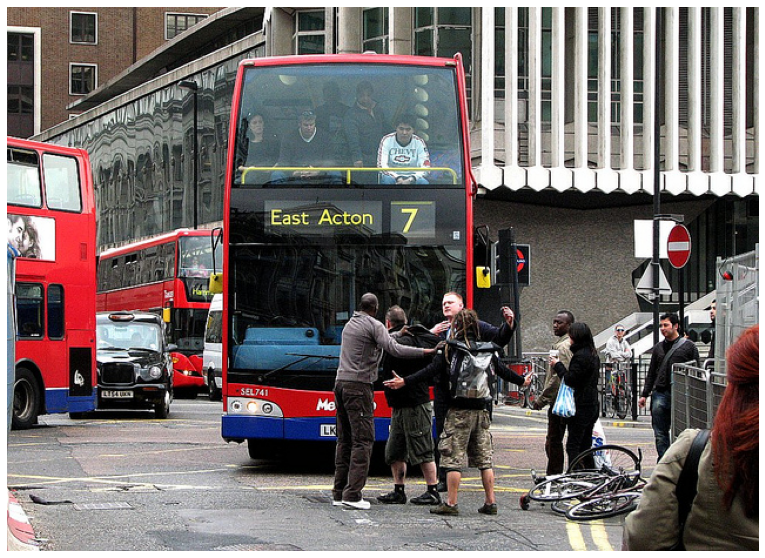

In [8]:
# Display a random image
img = images[np.random.randint(0, len(imgIds))]
im = cv2.imread(im_folder + img['file_name'])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im), plt.axis('off');

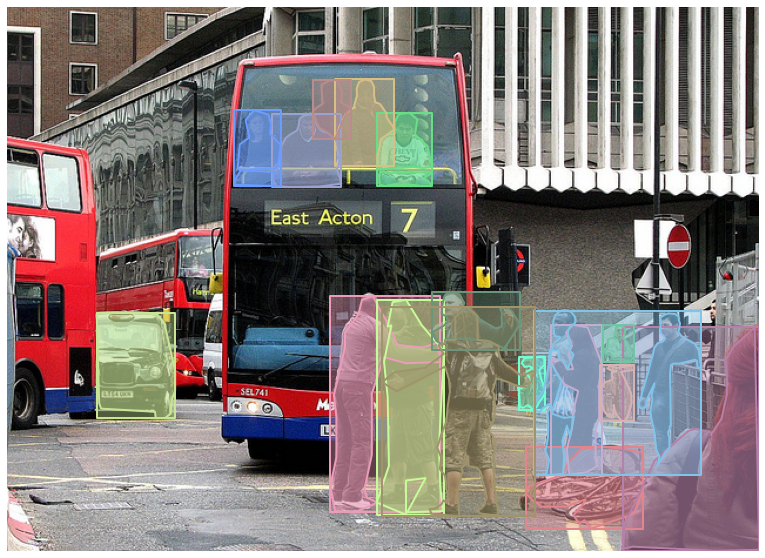

In [9]:
# Load and display instance annotations
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [13]:
# Show bbox labels
[{nms[annot['category_id'] - 1]: annot['bbox']} for annot in anns]

[{'car': [75.7, 259.62, 66.84, 89.83]},
 {'bicycle': [441.1, 373.84, 100.11, 69.87]},
 {'bicycle': [435.49, 297.03, 22.29, 45.69]},
 {'person': [314.31, 89.37, 47.1, 62.21]},
 {'person': [278.91, 61.06, 50.23, 74.01]},
 {'person': [225.33, 90.55, 58.42, 62.04]},
 {'person': [524.31, 272.19, 115.69, 190.29]},
 {'person': [274.68, 245.55, 93.64, 184.16]},
 {'person': [314.22, 248.67, 57.22, 183.12]},
 {'person': [361.65, 242.14, 74.73, 49.58]},
 {'person': [462.79, 269.99, 43.08, 127.74]},
 {'person': [448.07, 257.85, 142.66, 140.38]},
 {'person': [193.05, 87.32, 39.4, 64.31]},
 {'person': [506.96, 270.47, 26.78, 31.06]},
 {'person': [259.61, 61.49, 32.56, 50.35]},
 {'person': [318.97, 254.68, 129.99, 178.38]},
 {'bicycle': [504.77, 304.58, 28.79, 47.09]}]

Below is an example annotation, which is a dictionary with:
- `id`: int,
- `category_id`: int,
- `image_id`: int,
- `iscrowd`: a single object (iscrowd=0) or a collection of objects (iscrowd=1),
- `area`: float,
- `bbox`: coordinates of unnormalized bounding box in (cx, cy, w, h) format,
- `segmentation`: coordinates of polygon segmentation mask

In [15]:
anns[0]

{'segmentation': [[75.7,
   260.68,
   85.33,
   259.62,
   96.02,
   259.62,
   106.72,
   259.62,
   117.95,
   260.15,
   127.57,
   261.75,
   133.45,
   268.71,
   142.54,
   309.35,
   142.54,
   325.92,
   139.34,
   335.55,
   138.8,
   343.03,
   138.8,
   345.71,
   133.99,
   349.45,
   125.97,
   349.45,
   125.43,
   344.1,
   79.45,
   341.43,
   77.84,
   336.62]],
 'area': 5174.352900000001,
 'iscrowd': 0,
 'image_id': 542779,
 'bbox': [75.7, 259.62, 66.84, 89.83],
 'category_id': 3,
 'id': 138564}

## 2. Gluon
In addition to the COCO API, the Gluon library also allows us to visualize the COCO dataset.

Tutorial: https://gluon-cv.mxnet.io/build/examples_datasets/mscoco.html

In [ ]:
# Install gluoncv
!pip install --upgrade mxnet-cu100 gluoncv

We will need to download the entire COCO dataset to use GluonCV.

In [ ]:
# Download the full COCO dataset
!wget https://gluon-cv.mxnet.io/_downloads/b6ade342998e03f5eaa0f129ad5eee80/mscoco.py
!python mscoco.py --download-dir ./coco

In [16]:
from gluoncv import data, utils

train_dataset = data.COCODetection(root='./coco', splits=['instances_train2017'])
val_dataset = data.COCODetection(root='./coco', splits=['instances_val2017'])
print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=20.65s)
creating index...
index created!
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


Image size (height, width, RGB): (640, 512, 3)
Num of objects: 14
Bounding boxes (x_min, y_min, x_max, y_max):
 [[ 40.27 133.75 390.19 477.92]
 [  1.64 200.84  44.46 345.7 ]
 [449.7  225.5  480.92 370.71]
 [439.73 240.79 460.4  350.76]
 [429.98 232.82 449.02 254.95]
 [475.05 230.71 511.   387.14]
 [423.37 230.97 431.24 246.7 ]
 [ 93.17 252.48 118.25 288.32]
 [388.62 243.74 409.49 354.21]
 [385.81 252.24 511.   331.42]
 [488.56 258.56 510.72 331.13]
 [386.79 230.99 401.54 301.03]
 [394.75 319.98 428.71 350.16]
 [397.78 224.14 441.66 377.81]]
Class IDs:
 [[ 6.]
 [ 6.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [24.]
 [26.]
 [ 0.]
 [26.]
 [ 0.]]


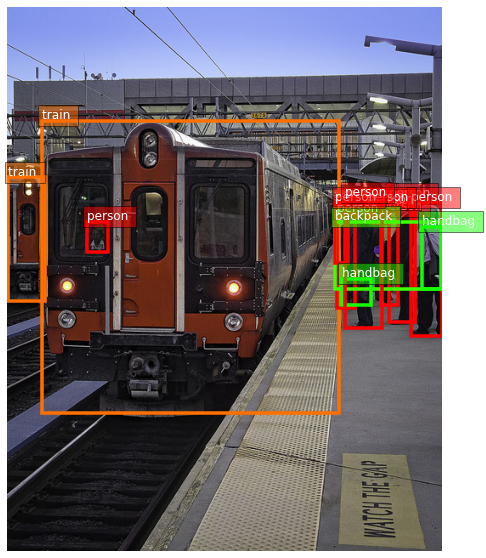

In [18]:
id_ = np.random.randint(0, 117266)
train_image, train_label = train_dataset[id_]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (x_min, y_min, x_max, y_max):\n', bounding_boxes)
print('Class IDs:\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.axis('off'), plt.show();